In [4]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report,accuracy_score

# Load the dataset
df = pd.read_csv('backend/data/synthetic_milk_steroids_dataset.csv')

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill example

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop("Steroid Level (ng/mL)", axis=1)  # Features
y = df["Steroid Level (ng/mL)"]  # Target

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Create a risk category column based on thresholds
def categorize_risk(level):
    if level < 5:
        return 'Safe'
    elif level < 15:
        return 'Moderate Risk'
    else:
        return 'High Risk'

df['Risk Category'] = df['Steroid Level (ng/mL)'].apply(categorize_risk)

# Encode the new target variable
df['Risk Category'] = LabelEncoder().fit_transform(df['Risk Category'])

# Separate features and target for classification
X_class = df.drop('Risk Category', axis=1)
y_class = df['Risk Category']

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = classifier.predict(X_test_class)
print(f"Accuracy Score: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))

# Save the model
joblib.dump(model, 'milk_steroid_detection_model.pkl')

print("Model saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'backend/data/synthetic_milk_steroids_dataset.csv'

Mean Absolute Error (MAE): 4.674250000000002
Mean Squared Error (MSE): 42.676056250000016
Root Mean Squared Error (RMSE): 6.532691348135163
R² Score: -0.8885822154612089


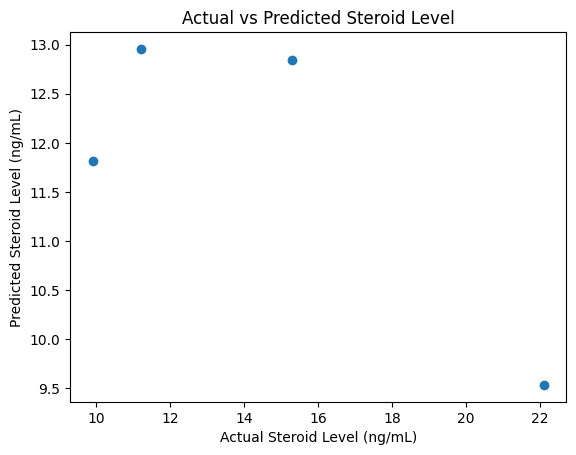

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Visualize Predicted vs Actual Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Steroid Level (ng/mL)")
plt.ylabel("Predicted Steroid Level (ng/mL)")
plt.title("Actual vs Predicted Steroid Level")
plt.show()

